In [1]:
import os
import cv2

import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pygmt
from salvus import namespace as sn
from salvus.mesh.unstructured_mesh_utils import extract_model_to_regular_grid
import geopandas as gpd
from skimage import data
from skimage.util import img_as_ubyte

import image_similarity_measures
from image_similarity_measures.quality_metrics import ssim, fsim, issm, uiq

--> Server: 'https://l.mondaic.com/licensing_server', User: 'claire.doody', Group: 'LLNL'.
--> Negotiating 1 license instance(s) for 'SalvusMesh' [license version 1.0.0] for 1 seconds ...
--> Success! [Total duration: 0.53 seconds]


In [15]:
image = img_as_float(data.eagle())

In [16]:
from skimage import data, img_as_float
from skimage import exposure

# Contrast stretching
p2, p98 = np.percentile(image, (2, 98))
img_rescale = exposure.rescale_intensity(image, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(image)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(image, clip_limit=0.03)

In [27]:
rows, cols = image.shape

noise = np.ones_like(image) * 0.5 * (image.max() - image.min())
rng = np.random.default_rng()
noise[rng.random(size=noise.shape) > 0.5] *= -1

img_noise = image + noise

In [28]:
rows, cols = image.shape

noise = np.ones_like(image) * 0.2 * (image.max() - image.min())
rng = np.random.default_rng()
noise[rng.random(size=noise.shape) > 0.5] *= -1

img_const = image + abs(noise)

In [29]:
from skimage.metrics import structural_similarity as ssim

ssim_none = ssim(image, image, data_range=image.max() - image.min())
ssim_rescale = ssim(image, img_rescale, data_range=img_rescale.max() - img_rescale.min())
ssim_const = ssim(image, img_const, data_range=img_const.max() - img_const.min())
ssim_noise = ssim(image, img_noise, data_range=img_noise.max() - img_noise.min())
ssim_adapteq = ssim(image, img_adapteq, data_range=img_adapteq.max() - img_adapteq.min())
ssim_eq = ssim(image, img_eq, data_range=img_eq.max() - img_eq.min())

In [30]:
print(ssim_none, ssim_rescale, ssim_const, ssim_noise, ssim_eq, ssim_adapteq)

1.0 0.9442536597224855 0.8454407871105633 0.023223511626037384 0.8924007221517849 0.6022864740456568


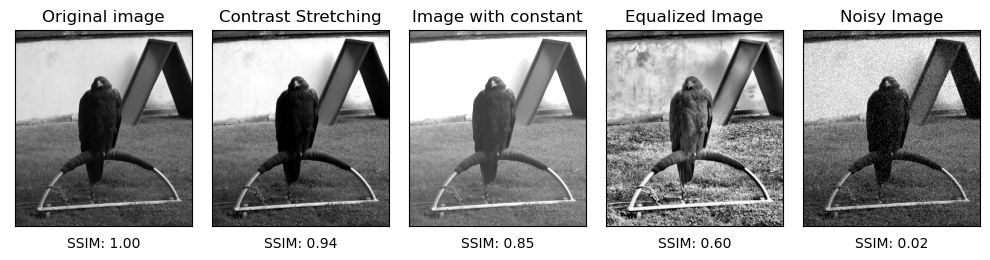

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 4))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[0].set_xlabel(f'SSIM: {ssim_none:.2f}')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title('Original image')

ax[1].imshow(img_rescale, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[1].set_xlabel(f'SSIM: {ssim_rescale:.2f}')
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title('Contrast Stretching')

ax[2].imshow(img_const, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[2].set_xlabel(f'SSIM: {ssim_const:.2f}')
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].set_title('Image with constant')

ax[3].imshow(img_adapteq, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[3].set_xlabel(f'SSIM: {ssim_adapteq:.2f}')
ax[3].set_xticks([])
ax[3].set_yticks([])
ax[3].set_title('Equalized Image')

ax[4].imshow(img_noise, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[4].set_xlabel(f'SSIM: {ssim_noise:.2f}')
ax[4].set_xticks([])
ax[4].set_yticks([])
ax[4].set_title('Noisy Image')

plt.tight_layout()
plt.savefig('FigureS9_example.jpg')